In [19]:
import pandas as pd
import numpy as np
import sklearn.linear_model
import sklearn.metrics
import sklearn.tree
import matplotlib
import sklearn.ensemble
import sklearn.neural_network

In [2]:
df = pd.read_csv('Stock Return Data.csv')

#df['Agric'].describe()

In [3]:
df['Mkt_rf_lead'] =  df['Mkt_rf'].shift(-1)

df

,Date,Mkt_rf,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,...,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other,Mkt_rf_lead
0,19700102,1.18,3.05,0.83,0.18,0.43,0.00,2.27,2.20,-0.04,...,3.68,2.18,0.13,1.62,0.44,1.61,3.88,0.82,4.84,0.59
1,19700105,0.59,3.67,0.71,-0.68,0.37,1.38,0.30,-0.47,-0.26,...,1.53,1.33,-0.45,0.25,0.64,1.65,2.49,-0.29,5.07,-0.74
2,19700106,-0.74,1.38,-0.38,0.32,0.12,0.05,-1.73,-0.02,-0.91,...,-0.93,-0.78,0.27,-1.22,-0.66,-0.96,-2.06,-1.00,-0.05,-0.15
3,19700107,-0.15,0.37,0.08,0.10,1.15,0.17,0.63,0.79,-0.57,...,-0.19,0.13,0.43,0.18,-0.19,-0.32,-0.19,-0.29,1.99,0.04
4,19700108,0.04,0.15,-0.08,-0.21,-0.18,-1.66,-0.83,0.36,-0.24,...,-0.66,-0.55,0.14,-0.08,1.16,0.43,-0.70,-0.20,-1.89,-0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12105,20171222,-0.07,0.66,0.48,-0.04,0.20,0.06,0.52,-0.39,-0.13,...,0.47,-0.11,-0.13,-0.15,-0.11,-0.35,0.18,-0.22,-0.28,-0.07
12106,20171226,-0.07,-0.20,0.03,0.35,0.44,-0.31,-0.60,-0.27,0.05,...,0.00,0.51,0.81,-0.25,-0.46,0.10,0.10,-0.27,0.04,0.05
12107,20171227,0.05,0.32,-0.19,0.35,0.29,0.54,-1.35,0.14,-0.08,...,0.37,-0.06,-0.14,0.72,-0.03,0.20,0.52,-0.11,0.30,0.22
12108,20171228,0.22,-0.08,0.01,-0.71,0.26,-0.68,-0.58,0.87,0.04,...,-0.35,0.40,0.13,0.39,0.45,0.55,0.63,0.31,0.28,-0.57


In [4]:
df = df.dropna()
df

,Date,Mkt_rf,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,...,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other,Mkt_rf_lead
0,19700102,1.18,3.05,0.83,0.18,0.43,0.00,2.27,2.20,-0.04,...,3.68,2.18,0.13,1.62,0.44,1.61,3.88,0.82,4.84,0.59
1,19700105,0.59,3.67,0.71,-0.68,0.37,1.38,0.30,-0.47,-0.26,...,1.53,1.33,-0.45,0.25,0.64,1.65,2.49,-0.29,5.07,-0.74
2,19700106,-0.74,1.38,-0.38,0.32,0.12,0.05,-1.73,-0.02,-0.91,...,-0.93,-0.78,0.27,-1.22,-0.66,-0.96,-2.06,-1.00,-0.05,-0.15
3,19700107,-0.15,0.37,0.08,0.10,1.15,0.17,0.63,0.79,-0.57,...,-0.19,0.13,0.43,0.18,-0.19,-0.32,-0.19,-0.29,1.99,0.04
4,19700108,0.04,0.15,-0.08,-0.21,-0.18,-1.66,-0.83,0.36,-0.24,...,-0.66,-0.55,0.14,-0.08,1.16,0.43,-0.70,-0.20,-1.89,-0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12104,20171221,0.23,0.36,0.31,-0.89,-0.37,-0.21,2.17,0.14,0.06,...,-0.09,0.14,0.09,0.13,1.10,-0.20,0.19,0.76,0.33,-0.07
12105,20171222,-0.07,0.66,0.48,-0.04,0.20,0.06,0.52,-0.39,-0.13,...,0.47,-0.11,-0.13,-0.15,-0.11,-0.35,0.18,-0.22,-0.28,-0.07
12106,20171226,-0.07,-0.20,0.03,0.35,0.44,-0.31,-0.60,-0.27,0.05,...,0.00,0.51,0.81,-0.25,-0.46,0.10,0.10,-0.27,0.04,0.05
12107,20171227,0.05,0.32,-0.19,0.35,0.29,0.54,-1.35,0.14,-0.08,...,0.37,-0.06,-0.14,0.72,-0.03,0.20,0.52,-0.11,0.30,0.22


In [5]:
temp = df.drop(columns = ['Date','Mkt_rf','Mkt_rf_lead'])
x = temp.to_numpy()
x

temp2 = df.filter(items = ['Mkt_rf_lead'])
y = temp2.to_numpy()
y

array([[ 0.59],
       [-0.74],
       [-0.15],
       ...,
       [ 0.05],
       [ 0.22],
       [-0.57]])

In [32]:
reg = sklearn.linear_model.Ridge(alpha = 1).fit(x,y)
y2 = reg.predict(x)
y2

mse2 = sklearn.metrics.mean_squared_error(y,y2)
mse2

1.027922900421461

In [19]:
mse = np.mean(sq)
mse
#np.sqrt(mse)

1.0504060918411633

In [8]:
dtr = sklearn.tree.DecisionTreeRegressor(random_state = 42, min_samples_leaf = 100).fit(x,y)
y2 = dtr.predict(x)
y2

mse3 = sklearn.metrics.mean_squared_error(y,y2)
mse3

0.9718440195526606

21

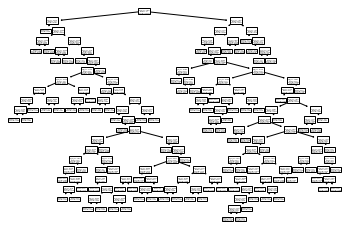

In [18]:
sklearn.tree.plot_tree(dtr)
dtr.get_depth()

In [17]:
rfr = sklearn.ensemble.RandomForestRegressor(random_state = 42,n_estimators = 100,
                                            min_samples_leaf = 100, max_features = 'sqrt').fit(x,y.ravel())

y2 = rfr.predict(x)
mse4 = sklearn.metrics.mean_squared_error(y,y2)
mse4


0.9814334662236628

In [20]:
mlp = sklearn.neural_network.MLPRegressor(random_state = 42, solver = 'sgd', max_iter = 10000, activation = 'relu',
                                         hidden_layer_sizes =(20,10,3)).fit(x,y.ravel())
y2 = mlp.predict(x)
mse5 = sklearn.metrics.mean_squared_error(y,y2)
mse5

0.8260754410623827